# Importing the modules

In [ ]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Downloading the data

In [64]:
# Set up the API
api = KaggleApi()
api.authenticate()

# Download dataset
api.dataset_download_files('roustekbio/breast-cancer-csv', path='../data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/roustekbio/breast-cancer-csv


# Reading the data

In [102]:
df=pd.read_csv('../data/breastCancer.csv')
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines
print(df.head())
print(df.shape)


        id  clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  class
0  1000025                5                1                 1                  1                2             1                3                1        1      2
1  1002945                5                4                 4                  5                7            10                3                2        1      2
2  1015425                3                1                 1                  1                2             2                3                1        1      2
3  1016277                6                8                 8                  1                3             4                3                7        1      2
4  1017023                4                1                 1                  3                2             1                3                1        1      2
(699, 11)


In [103]:
print(df.describe().style.background_gradient(cmap='Blues'))
print(df.dtypes)

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object


In [104]:
# Replace ? in  bare_nucleoli column with NA and convert to int
df['bare_nucleoli'] = df['bare_nucleoli'].replace('?', np.nan)
df['bare_nucleoli'] = df['bare_nucleoli'].astype(float)
print(df.dtypes)
print(df.head())

id                     int64
clump_thickness        int64
size_uniformity        int64
shape_uniformity       int64
marginal_adhesion      int64
epithelial_size        int64
bare_nucleoli        float64
bland_chromatin        int64
normal_nucleoli        int64
mitoses                int64
class                  int64
dtype: object
        id  clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  class
0  1000025                5                1                 1                  1                2            1.0                3                1        1      2
1  1002945                5                4                 4                  5                7           10.0                3                2        1      2
2  1015425                3                1                 1                  1                2            2.0                3                1        1      2
3  1016277 

# Handle missing values

In [105]:
print(df.isna().sum())

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64


In [106]:
# Dropped 16 missing values from bare_nucleoli column
df=df.dropna()
print(df.isna().sum())
print(df.shape)

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64
(683, 11)


# EDA

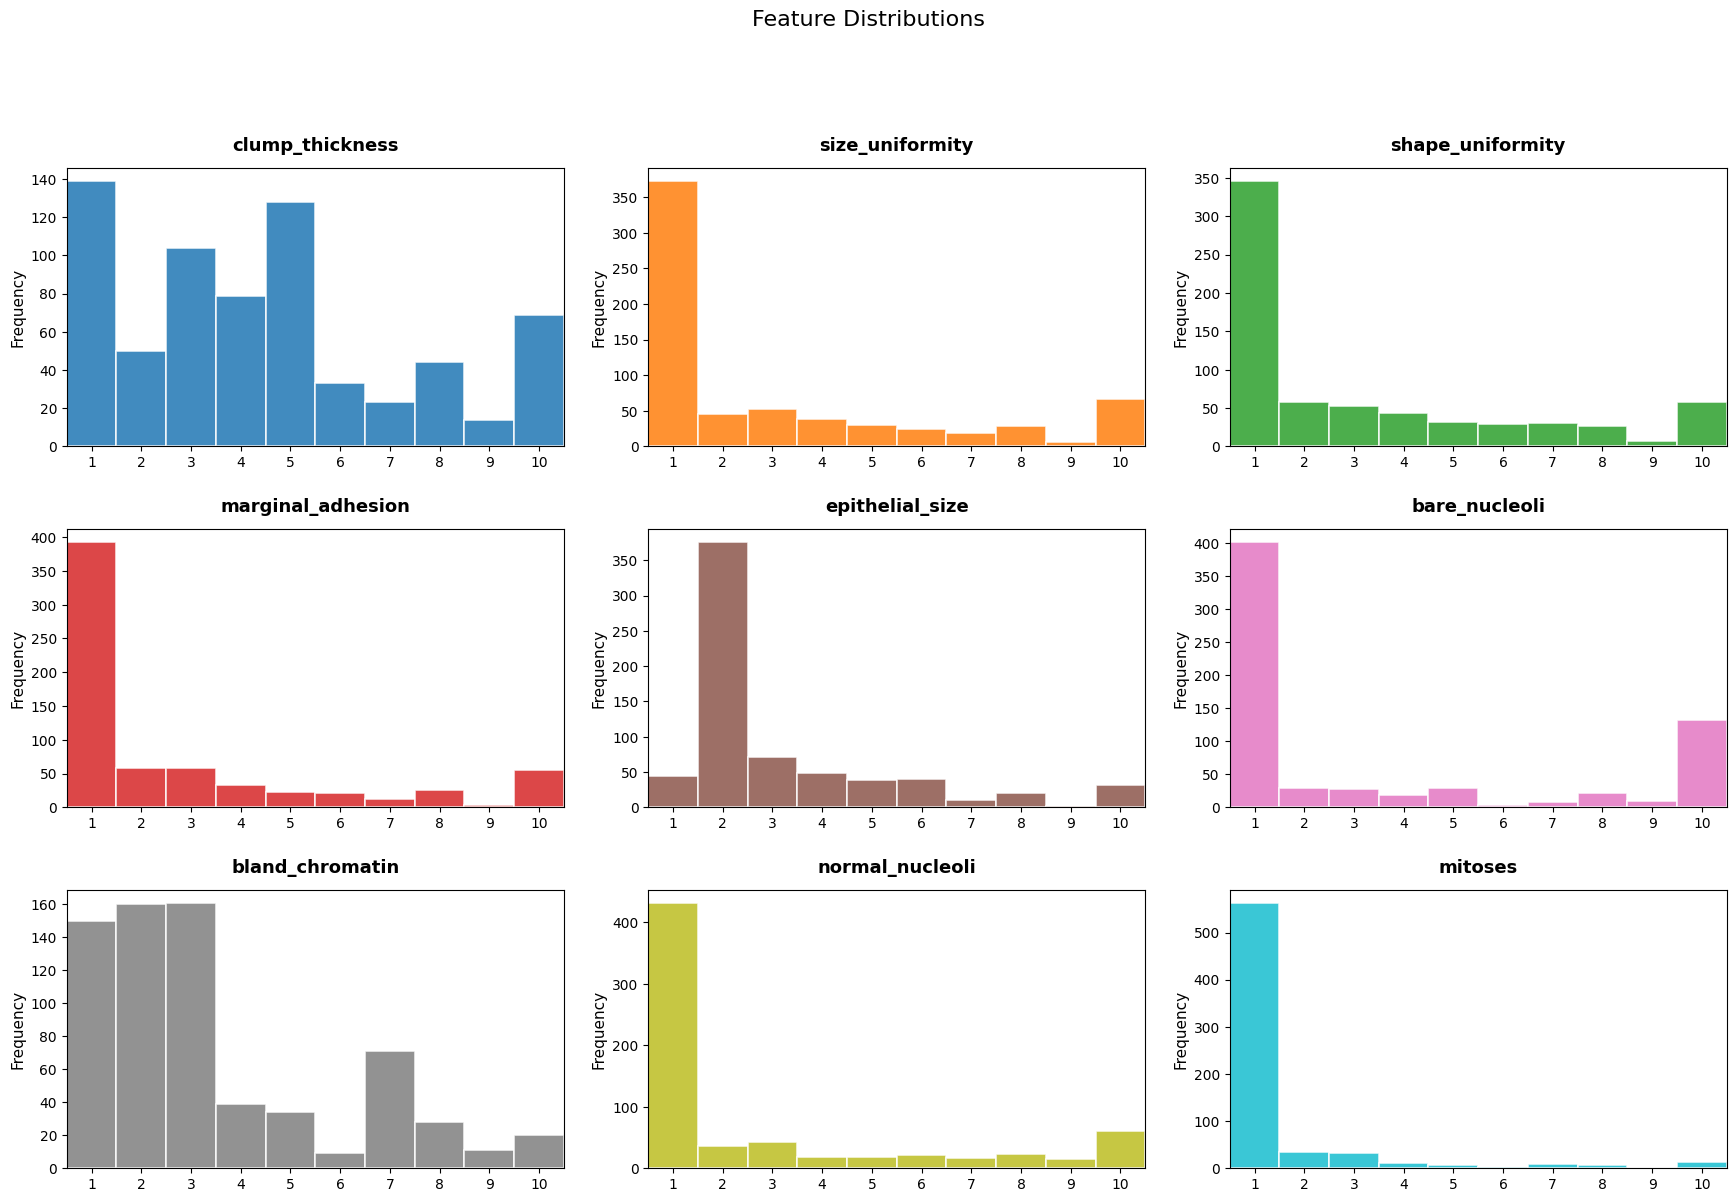

In [107]:
# Set clean style without any grids
plt.style.use('default')
plt.rcParams.update({
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.grid': False,  # Grids completely removed
    'xtick.bottom': True,
    'xtick.labelbottom': True,
    'xtick.direction': 'out',
    'ytick.left': True
})

# Assuming df is your DataFrame
columns_to_plot = df.columns[1:-1]  # Exclude first and last column

# Calculate layout - 3 rows
n_rows = 3
n_cols = (len(columns_to_plot) + n_rows - 1) // n_rows  # Round up division

# Create figure with proper spacing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
fig.suptitle('Feature Distributions', fontsize=16, y=1.02)

# Flatten axes
axes = axes.flatten()

# Create a color palette
colors = plt.cm.tab10(np.linspace(0, 1, len(columns_to_plot)))

# Plot histograms with correct formatting
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    # Plot histogram with proper bar alignment
    df[col].hist(ax=ax, bins=np.arange(1, 12)-0.5,  # Centers bins on integers
                color=colors[i], edgecolor='white', 
                linewidth=1.2, alpha=0.85)
    
    # Customize appearance
    ax.set_title(col, pad=12, fontsize=13, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11)
    
    # Set proper x-axis ticks and labels
    ax.set_xticks(range(1, 11))  # Integers 1-10
    ax.set_xlim(0.5, 10.5)  # Proper bin alignment
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Clean borders without grid
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.8)
    
    # Explicitly remove grid (double protection)
    ax.grid(False)

# Completely remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout with proper padding
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.show()

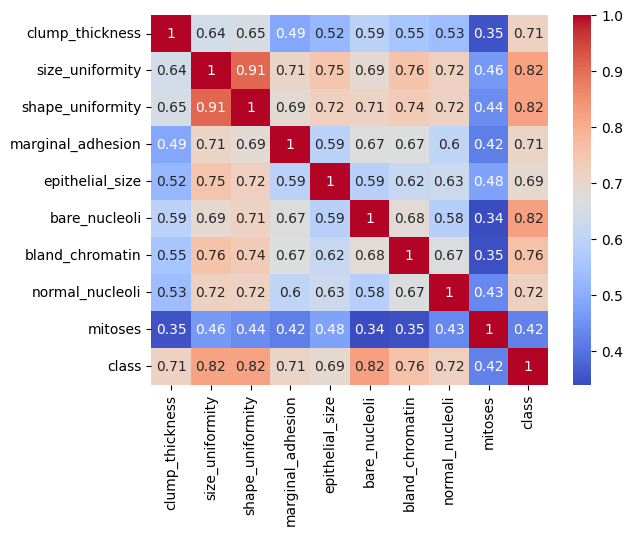

In [108]:
# Correlation heatmap
cor_data=df[df.columns[1:]]
cor_mat=cor_data.corr(numeric_only=True)
sns.heatmap(cor_mat,cmap='coolwarm', annot=True)
plt.show()
##mitosis colum has the least correlation with all the other features

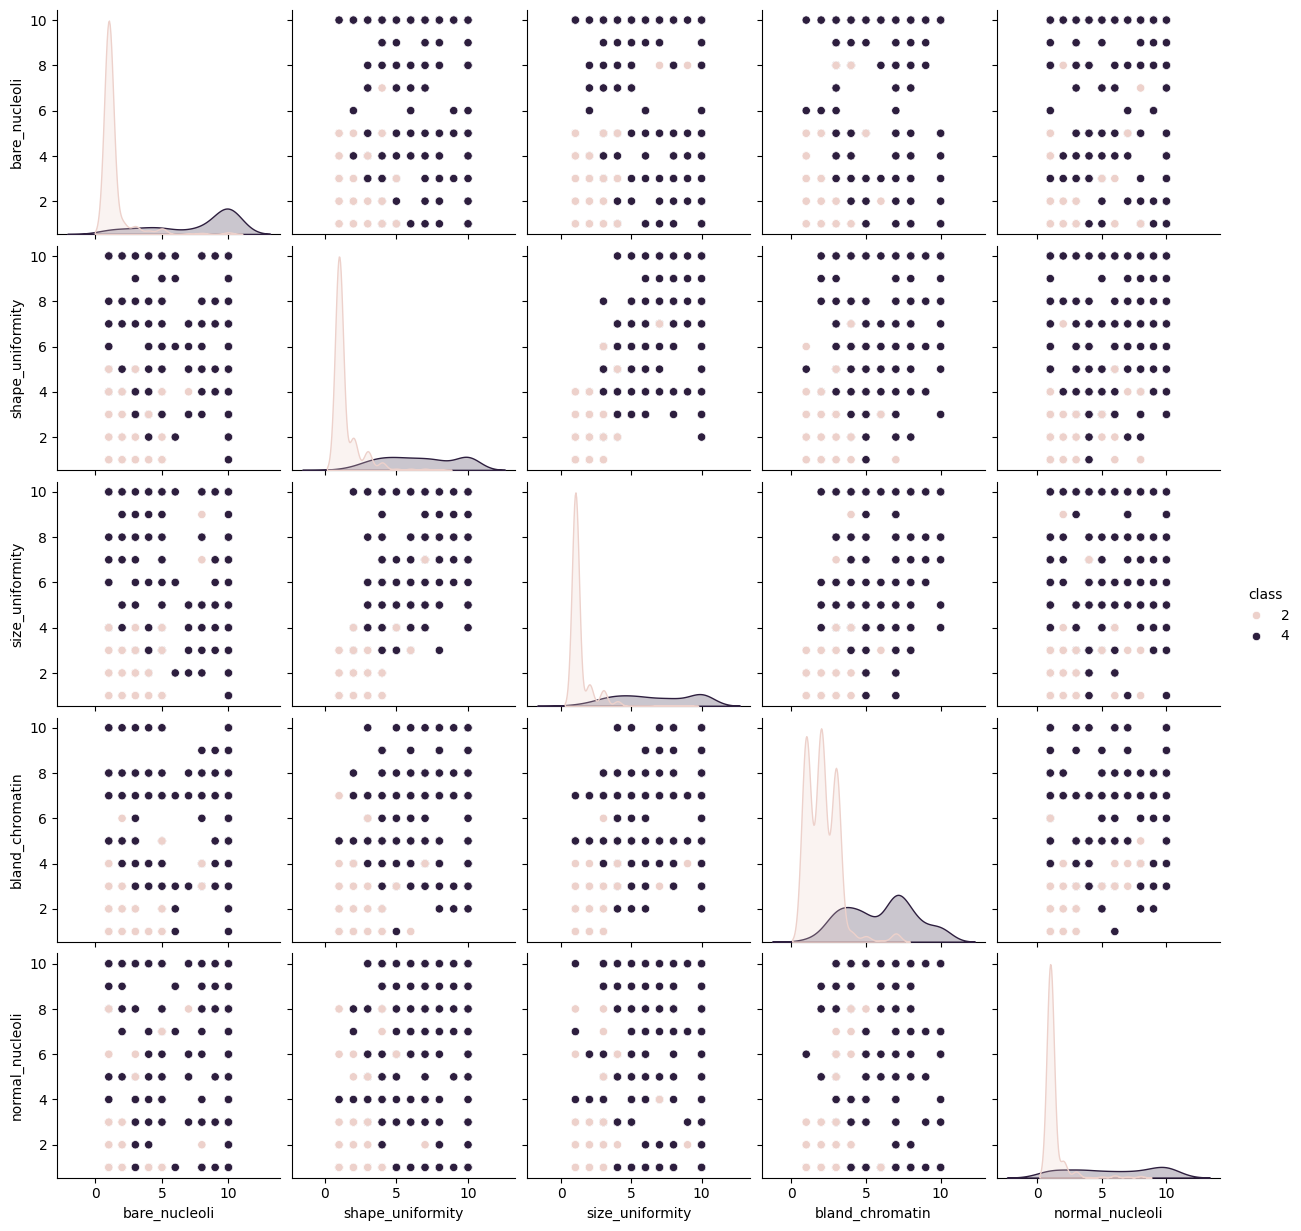

In [109]:
##pairplot between each variable to see the trend
#Get top 5 features most correlated with the target variable (class)
top_5_features=cor_mat['class'].sort_values(ascending=False).abs().index[1:6].to_list()
top_5_features
sns.pairplot(df[top_5_features + ['class']], hue="class")


# Encode the data

In [111]:
## Encoding is not needed since the data is already encoded 
# and each feature ranges from 1 to 10. 

# Scale the data

In [112]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df[columns_to_plot])

# Convert back to DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_plot, index=df.index)
print(scaled_df)

     clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli   mitoses
0           0.197905        -0.702212         -0.741774          -0.639366        -0.555608      -0.698853        -0.181827        -0.612927 -0.348400
1           0.197905         0.277252          0.262783           0.758032         1.695166       1.772867        -0.181827        -0.285105 -0.348400
2          -0.511643        -0.702212         -0.741774          -0.639366        -0.555608      -0.424217        -0.181827        -0.612927 -0.348400
3           0.552679         1.583204          1.602192          -0.639366        -0.105454       0.125054        -0.181827         1.354008 -0.348400
4          -0.156869        -0.702212         -0.741774           0.059333        -0.555608      -0.698853        -0.181827        -0.612927 -0.348400
..               ...              ...               ...                ...              ...   

# Split the data

In [113]:
from sklearn.model_selection import train_test_split

# Features and target
X = scaled_df
y = df['class'] 

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
## Define the problem as regression, classification and clustering
## Classification problem
## Models suitable for this problem: 
#### 1) logistic regression 
#### 2) SVM
#### 3) Decision Trees
#### 4) Random Forest
#### 5) Neural Network 

## Regression problem
## Models suitable for this problem: 
#### 1) linear regression 
#### 2) SVM
#### 3) Decision Trees
#### 4) Random Forest
#### 5) Neural Network 

# Define classifiers with evaluation metrics and plots

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,
    precision_recall_curve, roc_curve
)
from sklearn.calibration import CalibrationDisplay

def logistic_regression_classifier(X_train, X_test, y_train, y_test, 
                                 max_iter=1000, plot_curves=True, 
                                 tune_threshold=False, default_threshold=0.5):
    """
    Enhanced Logistic Regression classifier with threshold tuning capability.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        max_iter: Maximum iterations for LogisticRegression
        plot_curves: Whether to generate evaluation plots
        tune_threshold: Whether to find optimal threshold (default: False)
        default_threshold: Threshold to use if tune_threshold=False
        
    Returns:
        model: Trained LogisticRegression model
        metrics: Dictionary of evaluation metrics
        optimal_threshold: The optimal threshold found (if tune_threshold=True)
    """
    # Convert labels to {0, 1} if they're {2, 4}
    if set(y_train) == {2, 4}:
        y_train = y_train.replace({2: 0, 4: 1})
        y_test = y_test.replace({2: 0, 4: 1})
    
    # Train model
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Threshold tuning
    if tune_threshold:
        # Find optimal threshold using Youden's J statistic
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        optimal_threshold = thresholds[np.argmax(tpr - fpr)]
    else:
        optimal_threshold = default_threshold
    
    # Make predictions using selected threshold
    y_pred = (y_proba >= optimal_threshold).astype(int)
    
    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'threshold_used': optimal_threshold,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Plots
    if plot_curves:
        fig, ax = plt.subplots(2, 2, figsize=(15, 12))
        
        # Confusion Matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0, 0])
        ax[0, 0].set_title(f"Confusion Matrix (Threshold={optimal_threshold:.2f})")
        
        # ROC Curve with optimal threshold marker
        RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0, 1])
        ax[0, 1].plot([0, 1], [0, 1], 'k--')
        if tune_threshold:
            ax[0, 1].scatter(fpr[optimal_idx], tpr[optimal_idx], 
                            marker='o', color='red', 
                            label=f'Optimal Threshold ({optimal_threshold:.2f})')
            ax[0, 1].legend()
        ax[0, 1].set_title("ROC Curve")
        
        # Precision-Recall Curve
        PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax[1, 0])
        ax[1, 0].set_title("Precision-Recall Curve")
        
        # Calibration Curve
        CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10, ax=ax[1, 1])
        ax[1, 1].set_title("Calibration Curve")
        
        plt.tight_layout()
        plt.show()
    
    return model, metrics, optimal_threshold if tune_threshold else default_threshold

def SVM_classifier(X_train, X_test, y_train, y_test, 
                 kernel='linear', C=1.0, plot_curves=True):
    """
    Support Vector Machine classifier with evaluation metrics and plots.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        kernel: Kernel type for SVM (default: 'linear')
        C: Regularization parameter (default: 1.0)
        plot_curves: Whether to generate evaluation plots
        
    Returns:
        model: Trained SVC model
        metrics: Dictionary of evaluation metrics
    """
    # Convert labels to {0, 1} if they're {2, 4}
    if set(y_train) == {2, 4}:
        y_train = y_train.replace({2: 0, 4: 1})
        y_test = y_test.replace({2: 0, 4: 1})
    
    # Train model
    model = SVC(kernel=kernel, C=C, probability=True)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Make predictions using default threshold of 0.5
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Plots
    if plot_curves:
        fig, ax = plt.subplots(2, 2, figsize=(15, 12))
        
        # Confusion Matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0, 0])
        ax[0, 0].set_title(f"Confusion Matrix ")
        
        # ROC Curve with optimal threshold marker
        RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0, 1])
        ax[0, 1].plot([0, 1], [0, 1], 'k--')
        ax[0, 1].set_title("ROC Curve")
        
        # Precision-Recall Curve
        PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax[1, 0])
        ax[1, 0].set_title("Precision-Recall Curve")
        
        # Calibration Curve
        CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10, ax=ax[1, 1])
        ax[1, 1].set_title("Calibration Curve")
        
        plt.tight_layout()
        plt.show()
    return model, metrics

def decision_tree_classifier(X_train, X_test, y_train, y_test, 
                            max_depth=None, min_samples_split=2, 
                            plot_curves=True):
    """
    Decision Tree classifier with evaluation metrics and plots.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        max_depth: Maximum depth of the tree (default: None)
        min_samples_split: Minimum samples required to split an internal node (default: 2)
        plot_curves: Whether to generate evaluation plots
        
    Returns:
        model: Trained DecisionTreeClassifier model
        metrics: Dictionary of evaluation metrics
    """
    # Convert labels to {0, 1} if they're {2, 4}
    if set(y_train) == {2, 4}:
        y_train = y_train.replace({2: 0, 4: 1})
        y_test = y_test.replace({2: 0, 4: 1})
    
    # Train model
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Make predictions using default threshold of 0.5
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Plots
    if plot_curves:
        fig, ax = plt.subplots(2, 2, figsize=(15, 12))
        
        # Confusion Matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0, 0])
        ax[0, 0].set_title(f"Confusion Matrix ")
        
        # ROC Curve with optimal threshold marker
        RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0, 1])
        ax[0, 1].plot([0, 1], [0, 1], 'k--')
        ax[0, 1].set_title("ROC Curve")
        
        # Precision-Recall Curve
        PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax[1, 0])
        ax[1, 0].set_title("Precision-Recall Curve")
        
        # Calibration Curve
        CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10, ax=ax[1, 1])
        ax[1, 1].set_title("Calibration Curve")
        
        plt.tight_layout()
        plt.show()
    return model, metrics

def random_forest_classifier(X_train, X_test, y_train, y_test, 
                            n_estimators=100, max_depth=None, 
                            min_samples_split=2, plot_curves=True):
    """
    Random Forest classifier with evaluation metrics and plots.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        n_estimators: Number of trees in the forest (default: 100)
        max_depth: Maximum depth of the trees (default: None)
        min_samples_split: Minimum samples required to split an internal node (default: 2)
        plot_curves: Whether to generate evaluation plots
        
    Returns:
        model: Trained RandomForestClassifier model
        metrics: Dictionary of evaluation metrics
    """
    # Convert labels to {0, 1} if they're {2, 4}
    if set(y_train) == {2, 4}:
        y_train = y_train.replace({2: 0, 4: 1})
        y_test = y_test.replace({2: 0, 4: 1})
    
    # Train model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Make predictions using default threshold of 0.5
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Plots
    if plot_curves:
        fig, ax = plt.subplots(2, 2, figsize=(15, 12))
        
        # Confusion Matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0, 0])
        ax[0, 0].set_title(f"Confusion Matrix ")
        
        # ROC Curve with optimal threshold marker
        RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0, 1])
        ax[0, 1].plot([0, 1], [0, 1], 'k--')
        ax[0, 1].set_title("ROC Curve")
        
        # Precision-Recall Curve
        PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax[1, 0])
        ax[1, 0].set_title("Precision-Recall Curve")
        
        # Calibration Curve
        CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10, ax=ax[1, 1])
        ax[1, 1].set_title("Calibration Curve")
        
        plt.tight_layout()
        plt.show()
    return model, metrics

def neural_network_classifier(X_train, X_test, y_train, y_test, 
                              hidden_layers=(64, 32), 
                              activation='relu', 
                              epochs=50, batch_size=32, 
                              plot_curves=True):
    """
    Neural Network classifier with evaluation metrics and plots.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        hidden_layers: Tuple defining the number of neurons in each hidden layer (default: (64, 32))
        activation: Activation function for hidden layers (default: 'relu')
        epochs: Number of training epochs (default: 50)
        batch_size: Batch size for training (default: 32)
        plot_curves: Whether to generate evaluation plots
        
    Returns:
        model: Trained Keras Sequential model
        metrics: Dictionary of evaluation metrics
    """
    # Convert labels to {0, 1} if they're {2, 4}
    if set(y_train) == {2, 4}:
        y_train = y_train.replace({2: 0, 4: 1})
        y_test = y_test.replace({2: 0, 4: 1})
    
    # Build model
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    # Get predicted probabilities
    y_proba = model.predict(X_test).flatten()
    
    # Make predictions using default threshold of 0.5
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test , y_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }   
    # Plots
    if plot_curves:
        fig, ax = plt.subplots(2, 2, figsize=(15, 12))
        
        # Confusion Matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0, 0])
        ax[0, 0].set_title(f"Confusion Matrix ")
        
        # ROC Curve with optimal threshold marker
        RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0, 1])
        ax[0, 1].plot([0, 1], [0, 1], 'k--')
        ax[0, 1].set_title("ROC Curve")
        
        # Precision-Recall Curve
        PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax[1, 0])
        ax[1, 0].set_title("Precision-Recall Curve")
        
        # Calibration Curve
        CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10, ax=ax[1, 1])
        ax[1, 1].set_title("Calibration Curve")
        
        plt.tight_layout()
        plt.show()
    return model, metrics

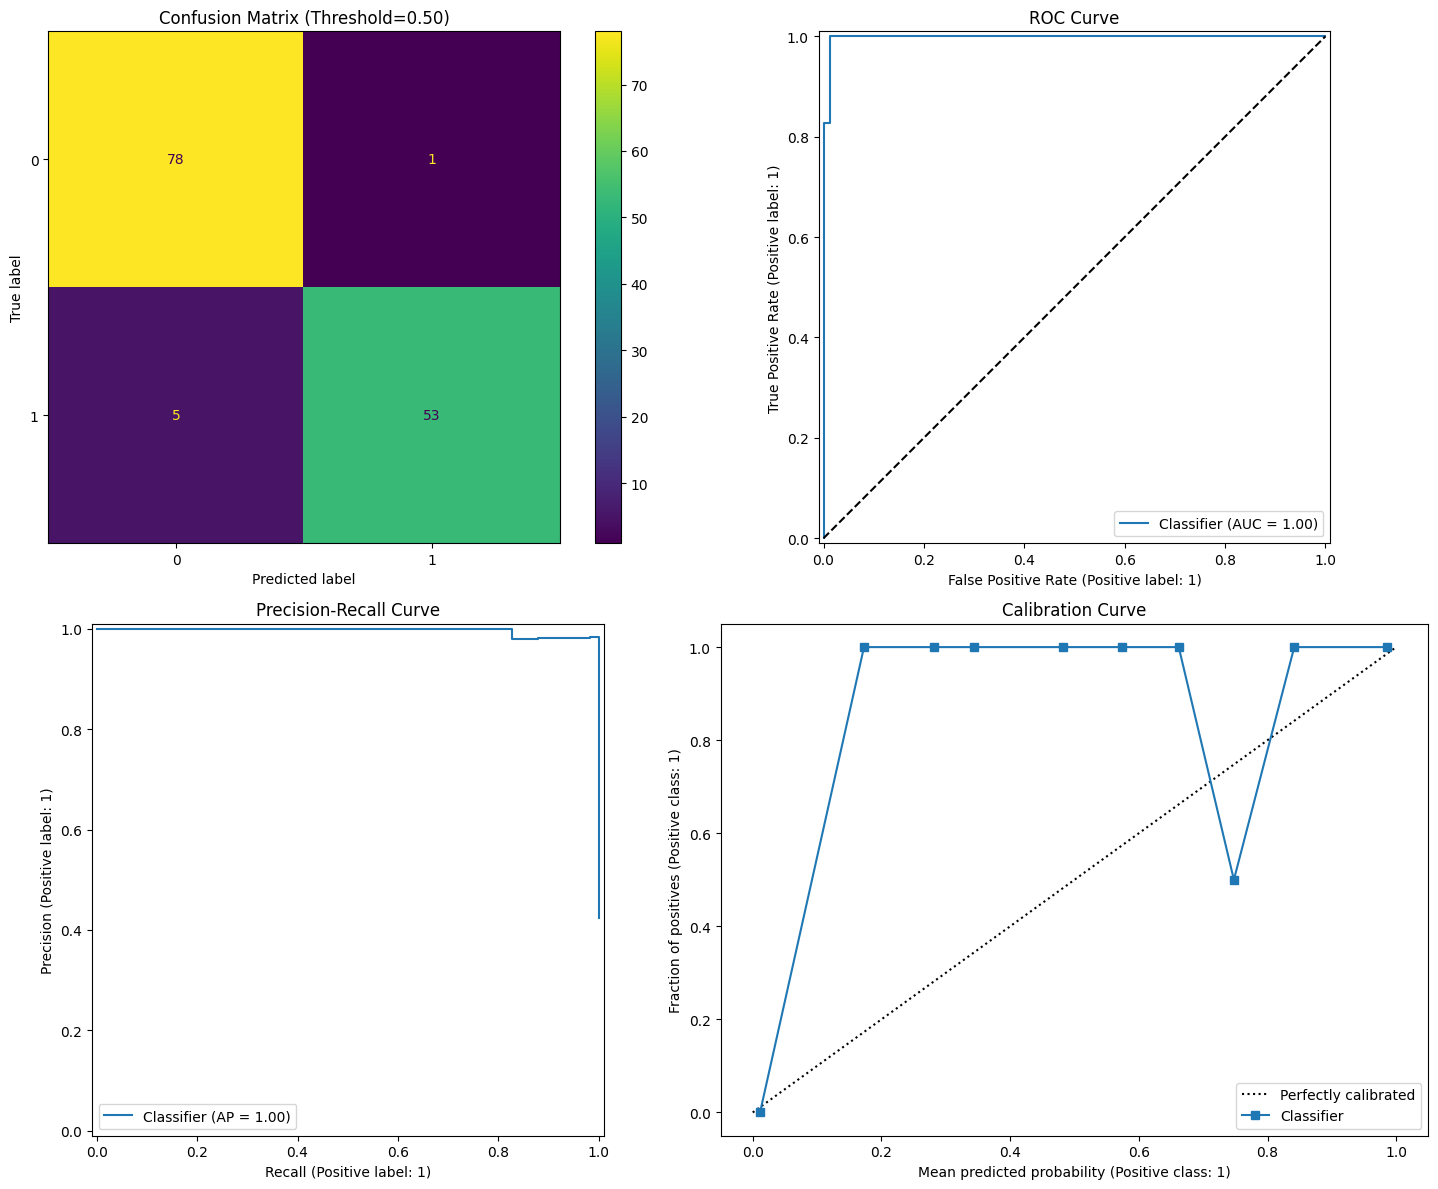

Accuracy: 0.9562043795620438
Classification Report:
 {'0': {'precision': 0.9397590361445783, 'recall': 0.9873417721518988, 'f1-score': 0.9629629629629629, 'support': 79.0}, '1': {'precision': 0.9814814814814815, 'recall': 0.9137931034482759, 'f1-score': 0.9464285714285714, 'support': 58.0}, 'accuracy': 0.9562043795620438, 'macro avg': {'precision': 0.9606202588130299, 'recall': 0.9505674378000873, 'f1-score': 0.9546957671957672, 'support': 137.0}, 'weighted avg': {'precision': 0.9574225531485226, 'recall': 0.9562043795620438, 'f1-score': 0.9559630015834395, 'support': 137.0}}
Confusion Matrix:
 [[78  1]
 [ 5 53]]


In [115]:
model, metrics, _ =logistic_regression_classifier(X_train,X_test,y_train,y_test, plot_curves=True, tune_threshold=False, default_threshold=0.5)
# Print metrics
print("Accuracy:", metrics['accuracy'])
print("Classification Report:\n", metrics['classification_report'])
print("Confusion Matrix:\n", metrics['confusion_matrix'])

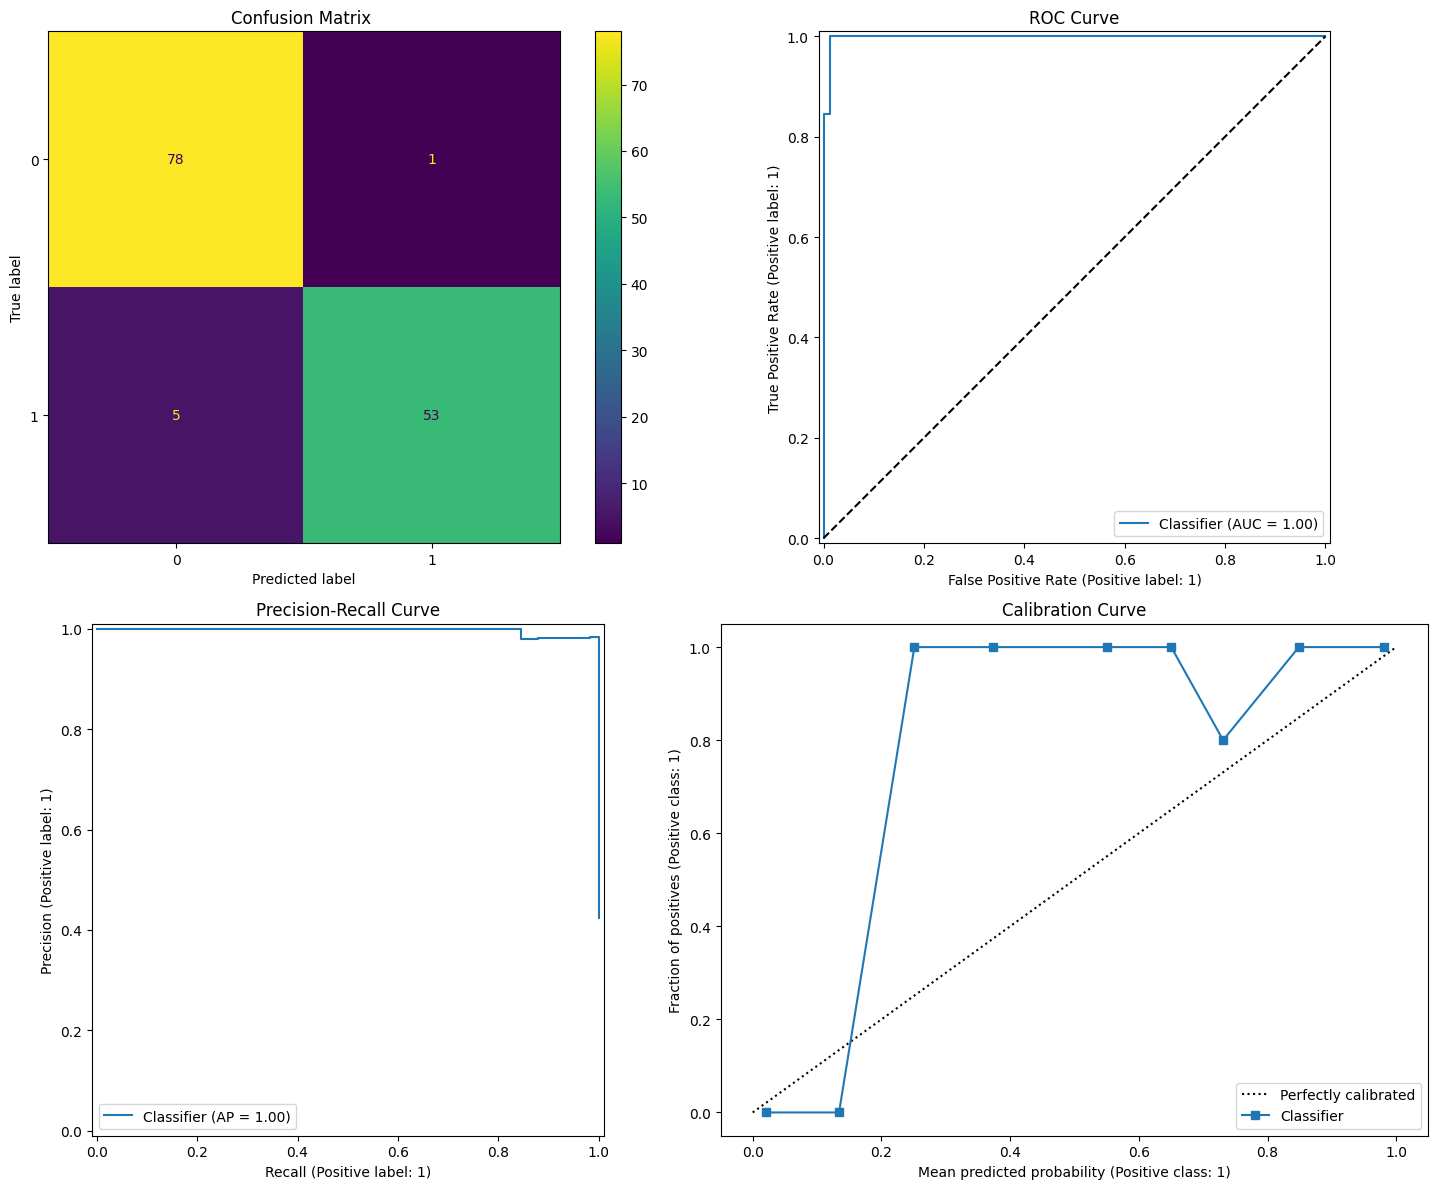

Accuracy: 0.9562043795620438
Classification Report:
 {'0': {'precision': 0.9397590361445783, 'recall': 0.9873417721518988, 'f1-score': 0.9629629629629629, 'support': 79.0}, '1': {'precision': 0.9814814814814815, 'recall': 0.9137931034482759, 'f1-score': 0.9464285714285714, 'support': 58.0}, 'accuracy': 0.9562043795620438, 'macro avg': {'precision': 0.9606202588130299, 'recall': 0.9505674378000873, 'f1-score': 0.9546957671957672, 'support': 137.0}, 'weighted avg': {'precision': 0.9574225531485226, 'recall': 0.9562043795620438, 'f1-score': 0.9559630015834395, 'support': 137.0}}
Confusion Matrix:
 [[78  1]
 [ 5 53]]


In [116]:
model, metrics =SVM_classifier(X_train,X_test,y_train,y_test,plot_curves=True)
# Print metrics
print("Accuracy:", metrics['accuracy'])
print("Classification Report:\n", metrics['classification_report'])
print("Confusion Matrix:\n", metrics['confusion_matrix'])

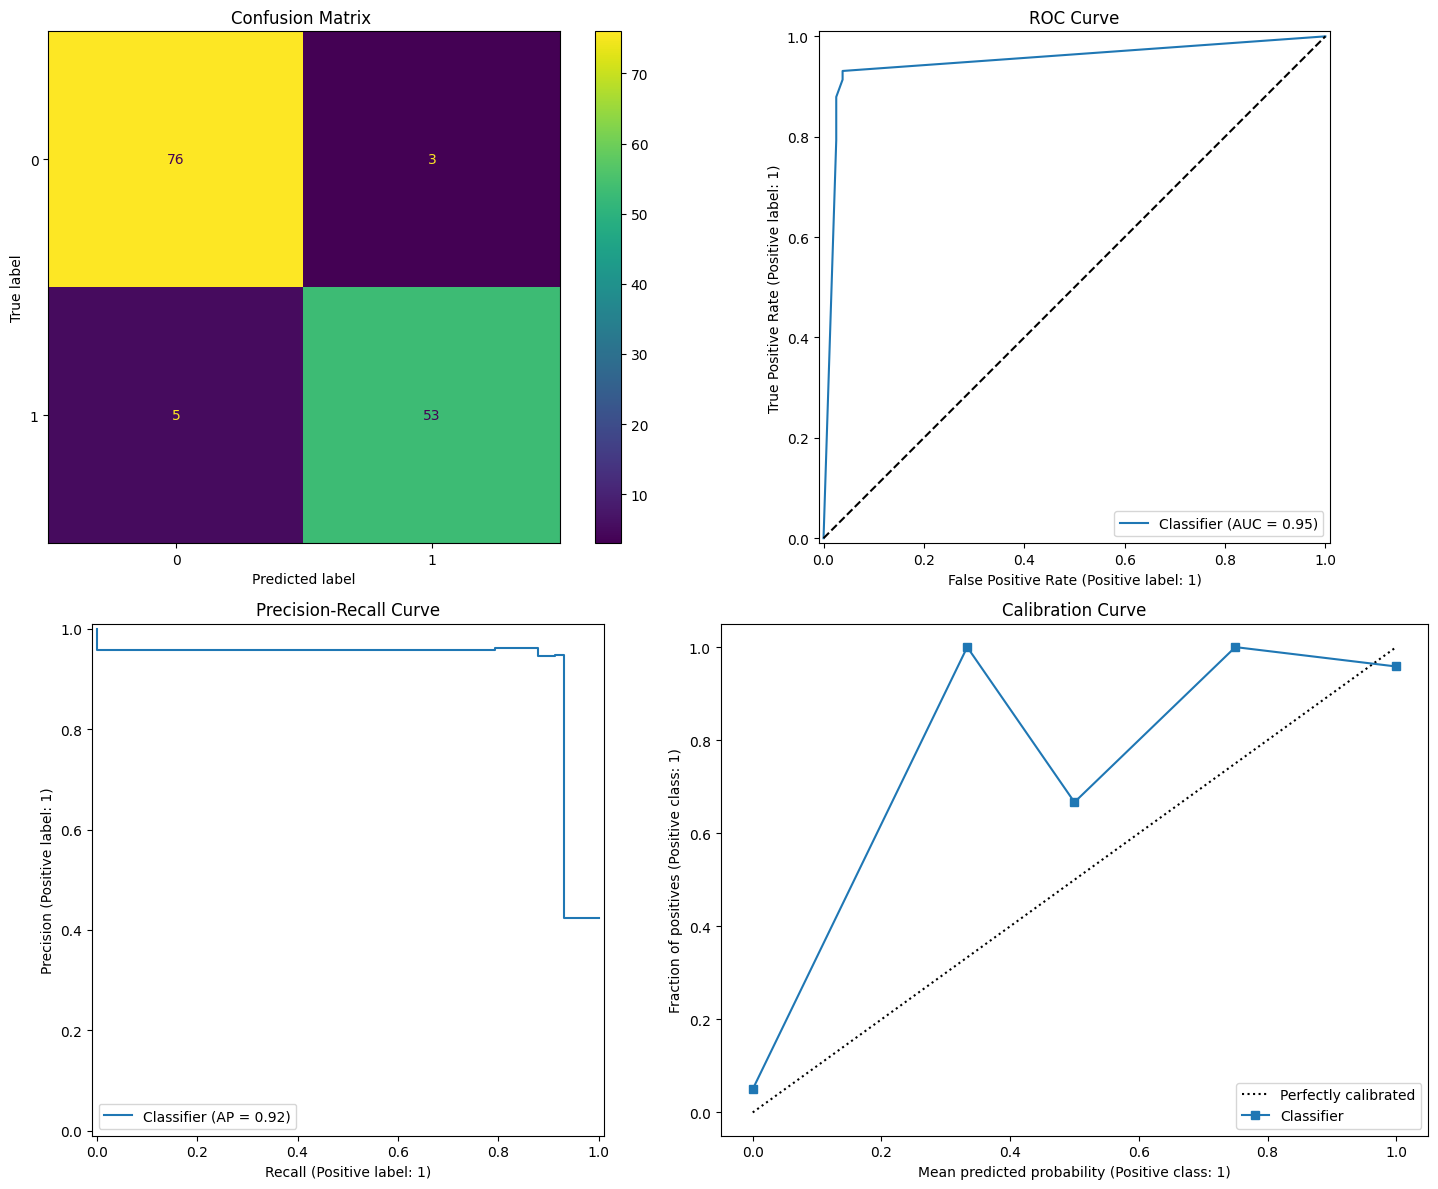

Accuracy: 0.9416058394160584
Classification Report:
 {'0': {'precision': 0.9382716049382716, 'recall': 0.9620253164556962, 'f1-score': 0.95, 'support': 79.0}, '1': {'precision': 0.9464285714285714, 'recall': 0.9137931034482759, 'f1-score': 0.9298245614035088, 'support': 58.0}, 'accuracy': 0.9416058394160584, 'macro avg': {'precision': 0.9423500881834215, 'recall': 0.9379092099519861, 'f1-score': 0.9399122807017544, 'support': 137.0}, 'weighted avg': {'precision': 0.9417249192188366, 'recall': 0.9416058394160584, 'f1-score': 0.9414585734409016, 'support': 137.0}}
Confusion Matrix:
 [[76  3]
 [ 5 53]]


In [117]:
model, metrics =decision_tree_classifier(X_train,X_test,y_train,y_test,plot_curves=True,min_samples_split=5)
# Print metrics
print("Accuracy:", metrics['accuracy'])
print("Classification Report:\n", metrics['classification_report'])
print("Confusion Matrix:\n", metrics['confusion_matrix'])

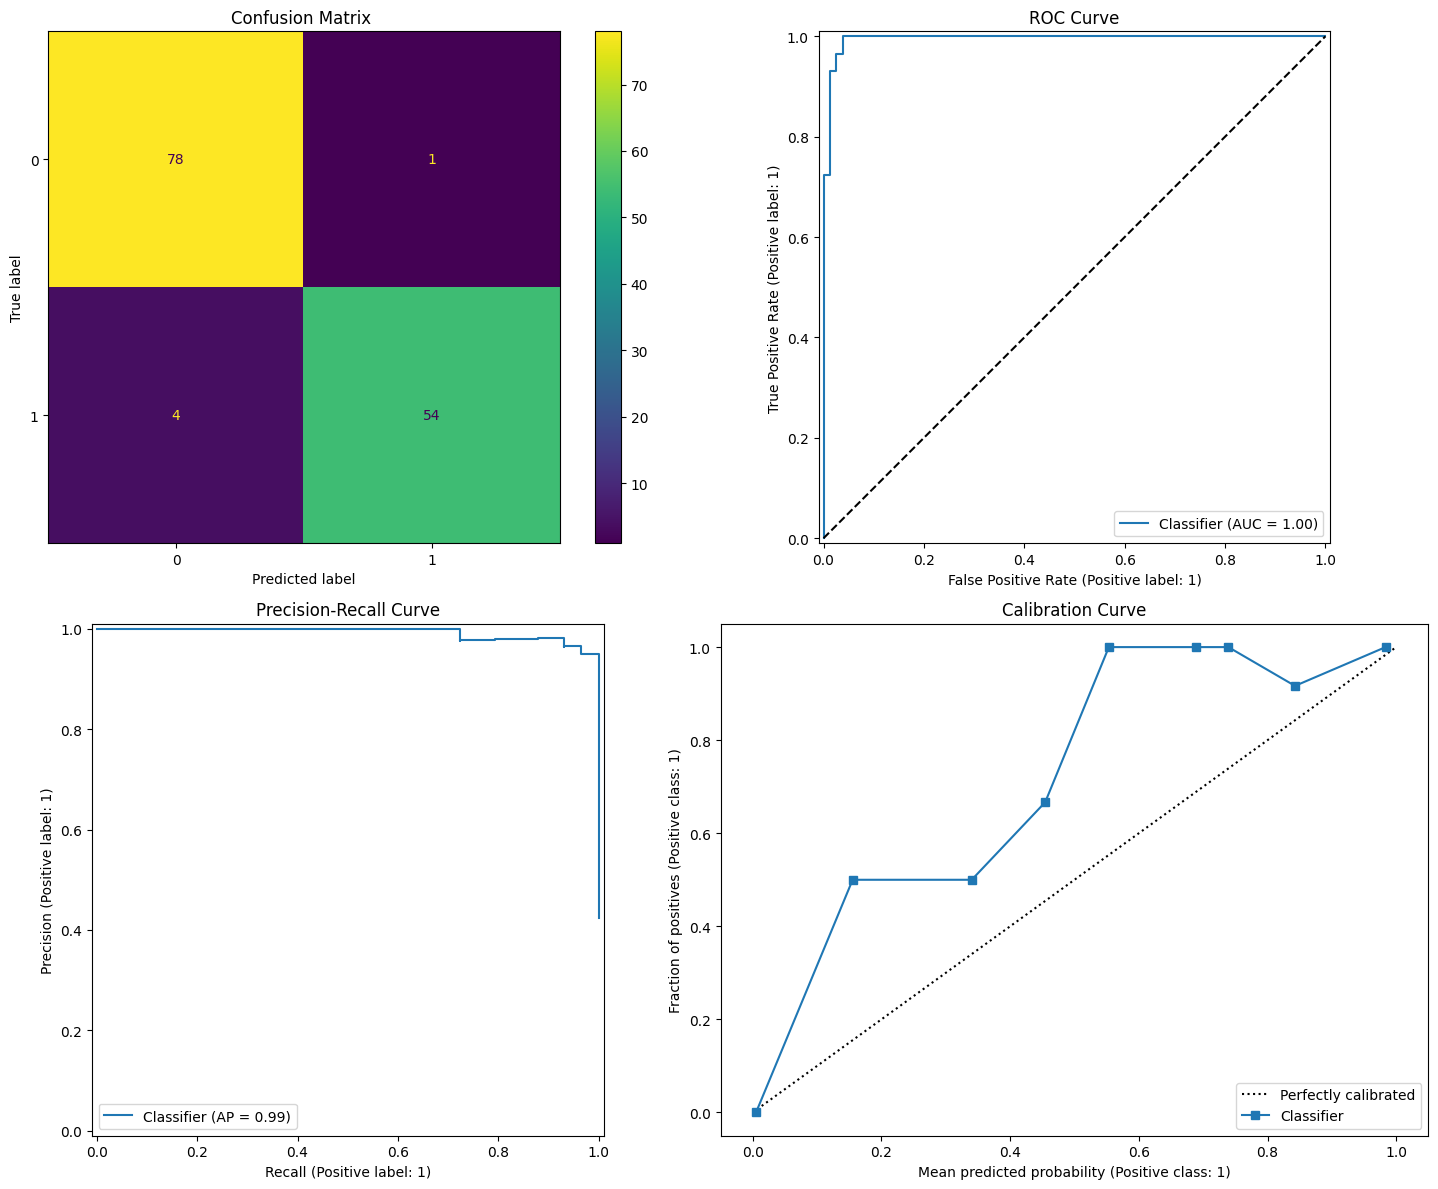

Accuracy: 0.9635036496350365
Classification Report:
 {'0': {'precision': 0.9512195121951219, 'recall': 0.9873417721518988, 'f1-score': 0.968944099378882, 'support': 79.0}, '1': {'precision': 0.9818181818181818, 'recall': 0.9310344827586207, 'f1-score': 0.9557522123893806, 'support': 58.0}, 'accuracy': 0.9635036496350365, 'macro avg': {'precision': 0.9665188470066519, 'recall': 0.9591881274552597, 'f1-score': 0.9623481558841314, 'support': 137.0}, 'weighted avg': {'precision': 0.9641736934953955, 'recall': 0.9635036496350365, 'f1-score': 0.9633592129161734, 'support': 137.0}}
Confusion Matrix:
 [[78  1]
 [ 4 54]]


In [118]:
model, metrics =random_forest_classifier(X_train,X_test,y_train,y_test,plot_curves=True,min_samples_split=5)
# Print metrics
print("Accuracy:", metrics['accuracy'])
print("Classification Report:\n", metrics['classification_report'])
print("Confusion Matrix:\n", metrics['confusion_matrix'])

/Users/iti/Upskilling/Machine_Learning_AI_Bootcamp_UofC/Capstone_project/Breast_cancer_capstone_project/capstone_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


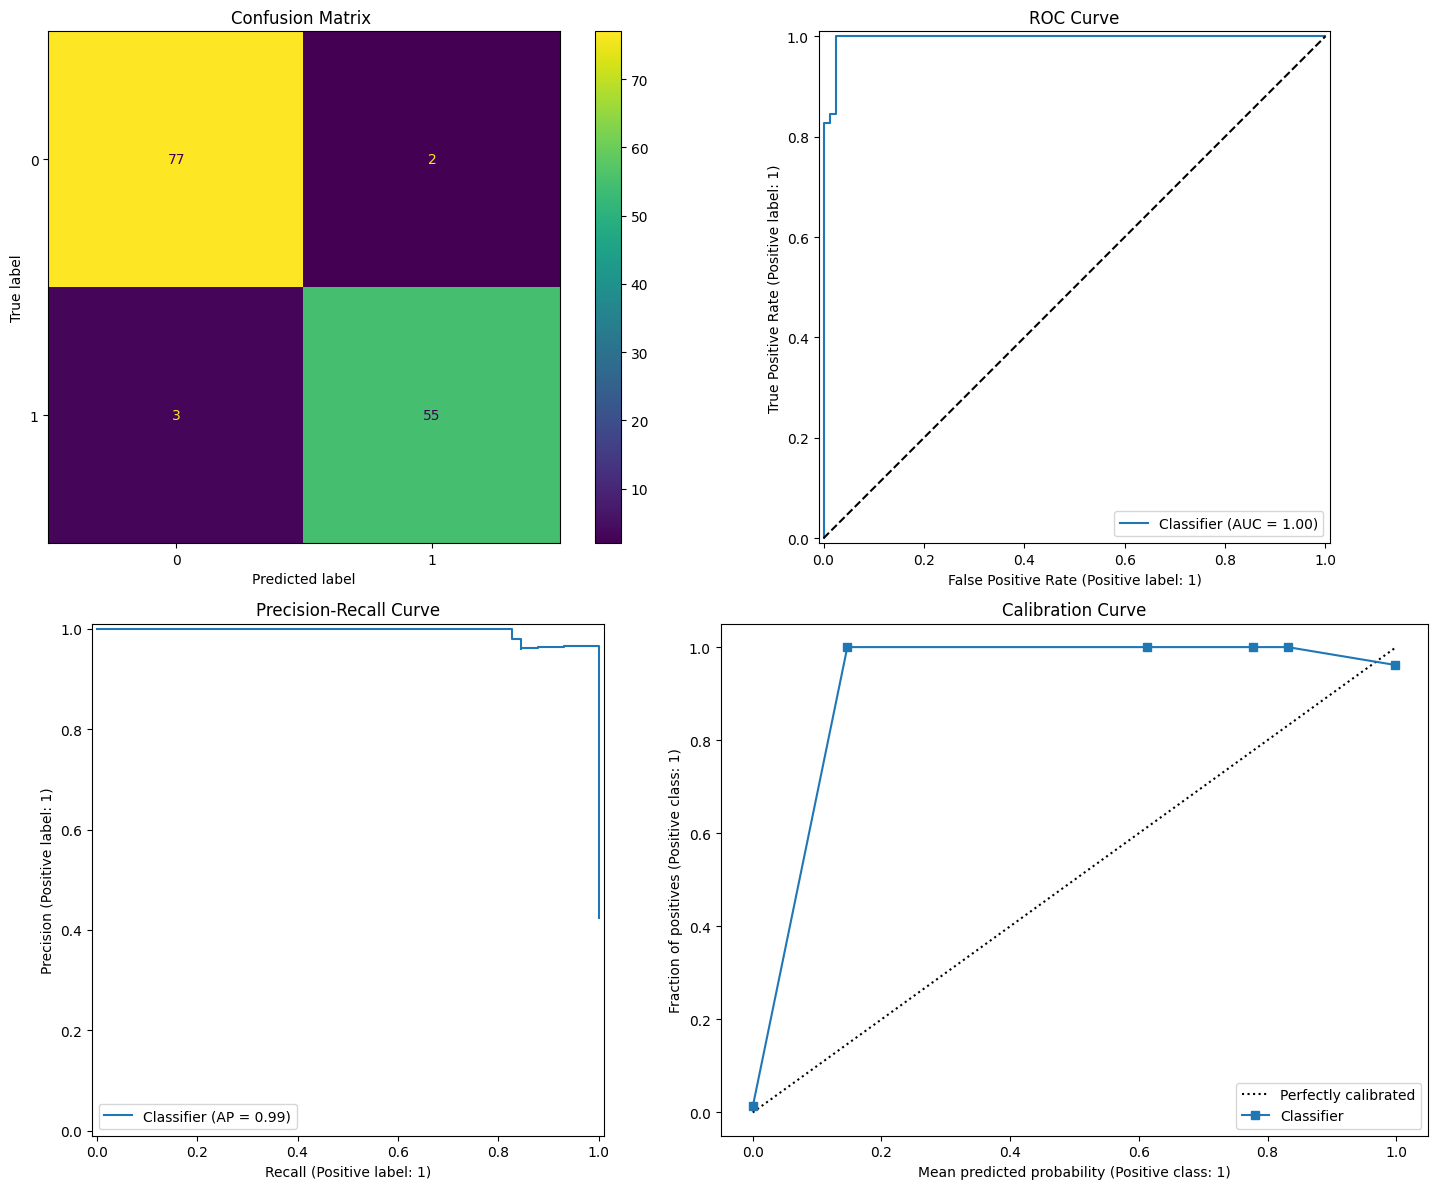

Accuracy: 0.9635036496350365
Classification Report:
 {'0': {'precision': 0.9625, 'recall': 0.9746835443037974, 'f1-score': 0.9685534591194969, 'support': 79.0}, '1': {'precision': 0.9649122807017544, 'recall': 0.9482758620689655, 'f1-score': 0.9565217391304348, 'support': 58.0}, 'accuracy': 0.9635036496350365, 'macro avg': {'precision': 0.9637061403508772, 'recall': 0.9614797031863815, 'f1-score': 0.9625375991249658, 'support': 137.0}, 'weighted avg': {'precision': 0.9635212575233706, 'recall': 0.9635036496350365, 'f1-score': 0.9634597382482151, 'support': 137.0}}
Confusion Matrix:
 [[77  2]
 [ 3 55]]


,Feature,Importance
5,bare_nucleoli,0.326294
6,bland_chromatin,0.176317
0,clump_thickness,0.151982
7,normal_nucleoli,0.069663
2,shape_uniformity,0.069302
3,marginal_adhesion,0.067412
1,size_uniformity,0.055651
8,mitoses,0.051595
4,epithelial_size,0.031785


In [119]:
model, metrics =neural_network_classifier(X_train,X_test,y_train,y_test,plot_curves=True,epochs=200, hidden_layers=(64, 32))
# Print metrics
print("Accuracy:", metrics['accuracy'])
print("Classification Report:\n", metrics['classification_report'])
print("Confusion Matrix:\n", metrics['confusion_matrix'])      

import shap

# Convert X_test (numpy array) to DataFrame with correct feature names
feature_names = X.columns
processed_df = pd.DataFrame(X_test, columns=feature_names)

# Initialize JS for SHAP plots
shap.initjs()

# Create explainer
explainer = shap.Explainer(model, processed_df)
# Calculate SHAP values
shap_values = explainer(processed_df)
# Top Influential Features
try:
    shap_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(shap_values.values).mean(axis=0)
    }).sort_values('Importance', ascending=False)
    # Normalize so the sum is 1
    shap_df['Importance'] = shap_df['Importance'] / shap_df['Importance'].sum()
    display(shap_df.style.background_gradient(cmap='Blues'))
except Exception as e:
    print("Could not generate SHAP importance table:", e)

# Since bare nuclei was the most important feature based on classification, use regresion models to predict this variable

In [120]:
#Encoding not needed since the data is already encoded
# Convert 'Class' column to binary values (0 and 1)
df['class'] = df['class'].map({2: 0, 4: 1})

# Drop rows where 'class' is NaN before converting to int
df = df.dropna(subset=['class'])
df['class'] = df['class'].astype(int)

# Scale features except 'bare_nucleoli', 'id', and 'class'
features_to_scale = [col for col in df.columns if col not in ['bare_nucleoli', 'id']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Create scaled_df with original columns (except 'bare_nucleoli', 'id', 'class'), then add back 'bare_nucleoli', 'class', and 'id'
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale, index=df.index)
scaled_df['bare_nucleoli'] = df['bare_nucleoli'].values
#scaled_df['class'] = df['class'].values
print(scaled_df)


     clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  epithelial_size  bland_chromatin  normal_nucleoli   mitoses     class  bare_nucleoli
0           0.197905        -0.702212         -0.741774          -0.639366        -0.555608        -0.181827        -0.612927 -0.348400 -0.733681            1.0
1           0.197905         0.277252          0.262783           0.758032         1.695166        -0.181827        -0.285105 -0.348400 -0.733681           10.0
2          -0.511643        -0.702212         -0.741774          -0.639366        -0.555608        -0.181827        -0.612927 -0.348400 -0.733681            2.0
3           0.552679         1.583204          1.602192          -0.639366        -0.105454        -0.181827         1.354008 -0.348400 -0.733681            4.0
4          -0.156869        -0.702212         -0.741774           0.059333        -0.555608        -0.181827        -0.612927 -0.348400 -0.733681            1.0
..               ...              

In [121]:
from sklearn.model_selection import train_test_split
# Features and target
X = scaled_df[features_to_scale]
y = df['bare_nucleoli']  # Assuming 'bare_nucleoli' is the target variable

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def linear_regression_model(X_train, X_test, y_train, y_test, plot_curves=True):
    """
    Linear Regression model with evaluation metrics and optional plots.
    """
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }
    
    if plot_curves:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Linear Regression: Actual vs Predicted")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()
    
    return model, metrics
def SVM_regression(X_train, X_test, y_train, y_test, kernel='linear', C=1.0, plot_curves=True):
    """
    Support Vector Regression model with evaluation metrics and optional plots.
    """
    
    from sklearn.svm import SVR
    
    model = SVR(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }
    
    if plot_curves:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("SVR: Actual vs Predicted")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()
    
    return model, metrics
def decision_tree_regression(X_train, X_test, y_train, y_test, max_depth=None, min_samples_split=2, plot_curves=True):
    """
    Decision Tree Regression model with evaluation metrics and optional plots.
    """
    from sklearn.tree import DecisionTreeRegressor
    
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }
    
    if plot_curves:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Decision Tree Regression: Actual vs Predicted")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()
    
    return model, metrics
def random_forest_regression(X_train, X_test, y_train, y_test, 
                            n_estimators=100, max_depth=None, min_samples_split=2, 
                            tune_hyperparams=False, plot_curves=True):
    """
    Enhanced Random Forest Regression model with optional hyperparameter tuning.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        n_estimators: Number of trees in the forest
        max_depth: Maximum depth of the tree
        min_samples_split: Minimum number of samples required to split an internal node
        tune_hyperparams: Whether to perform GridSearchCV for hyperparameter tuning
        plot_curves: Whether to generate evaluation plots
        
    Returns:
        model: Trained RandomForestRegressor model
        metrics: Dictionary of evaluation metrics
        best_params: Dictionary of best parameters (if tuning was performed)
    """
    
    if tune_hyperparams:
        # Define parameter grid for tuning
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        
        # Perform grid search
        grid_search = GridSearchCV(
            RandomForestRegressor(),
            param_grid,
            cv=5,
            scoring='r2',
            n_jobs=-1  # Use all available cores
        )
        grid_search.fit(X_train, y_train)
        
        # Get best model and parameters
        model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        print(f"Best parameters found: {best_params}")
        print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")
    else:
        # Use standard parameters
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        best_params = None
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }
    
    # Plot results
    if plot_curves:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Random Forest Regression: Actual vs Predicted")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()
    
    return model, metrics, best_params
def neural_network_regression(X_train, X_test, y_train, y_test, hidden_layers=(64, 32), activation='relu', epochs=50, batch_size=32, plot_curves=True):
    """
    Neural Network Regression model with evaluation metrics and optional plots.
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        hidden_layers: Tuple defining the number of neurons in each hidden layer (default: (64, 32))
        activation: Activation function for hidden layers (default: 'relu')
        epochs: Number of training epochs (default: 50)
        batch_size: Batch size for training (default: 32)
        plot_curves: Whether to generate evaluation plots
        
    Returns:
        model: Trained Keras Sequential model
        metrics: Dictionary of evaluation metrics
    """
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    
    # Build model
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    
    model.add(Dense(1))  # Single output for regression
    
    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    
    # Train model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    # Get predictions
    y_pred = model.predict(X_test).flatten()
    
    # Metrics
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }
    
    if plot_curves:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Neural Network Regression: Actual vs Predicted")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()
    
    return model, metrics

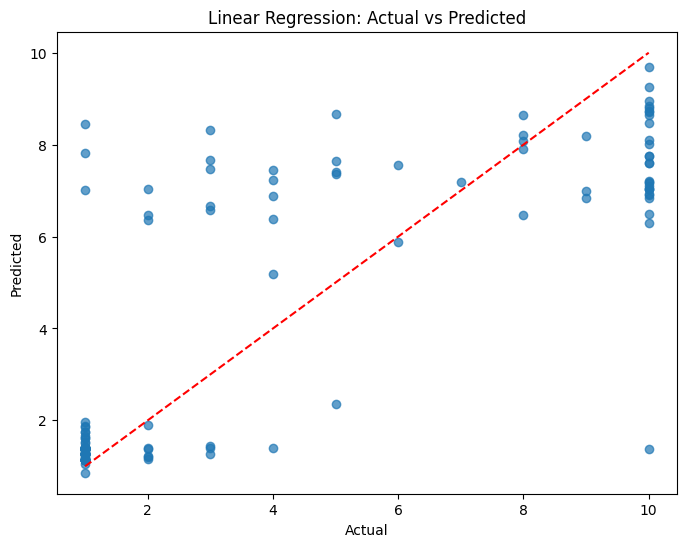

Mean Squared Error: 4.716784393232043
Mean Absolute Error: 1.4228050645589807
R-squared: 0.6517911034503653


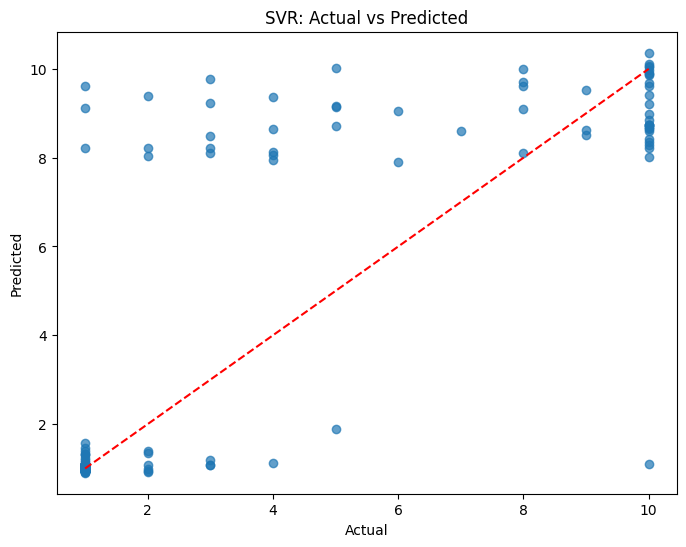

Mean Squared Error: 6.113198908942122
Mean Absolute Error: 1.3306045664745514
R-squared: 0.5487030847698857


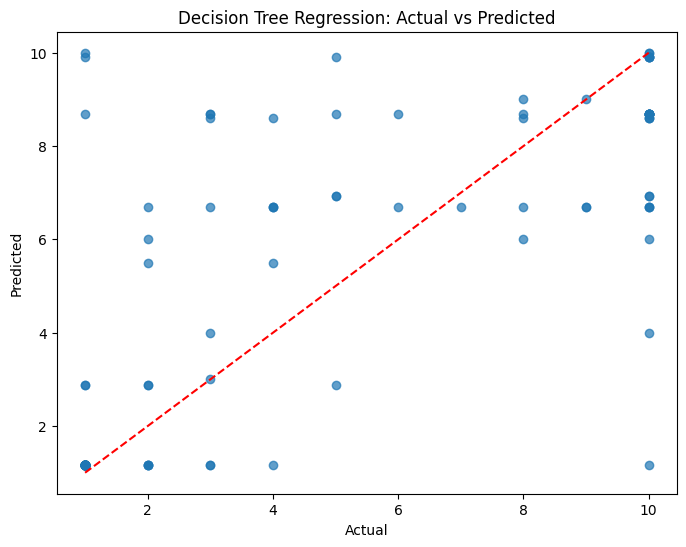

Mean Squared Error: 5.355312011094311
Mean Absolute Error: 1.3236057753873736
R-squared: 0.6046528459647535
Best parameters found: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation R²: 0.7058


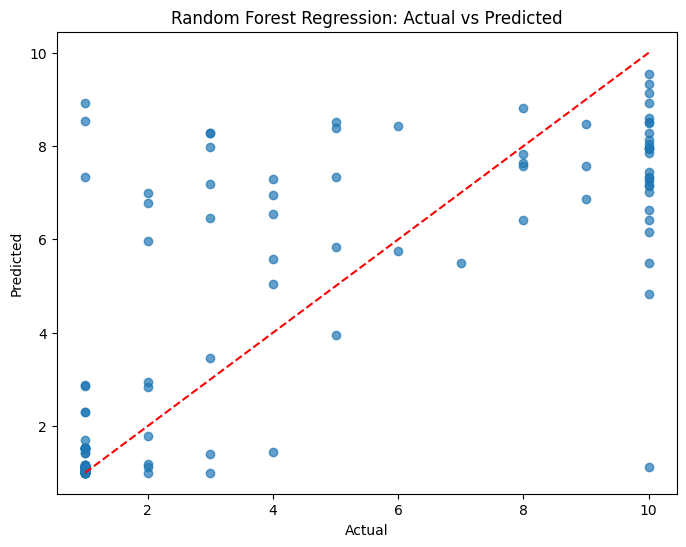

Mean Squared Error: 5.131301317420934
Mean Absolute Error: 1.4058727785795817
R-squared: 0.621190069199135
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}


/Users/iti/Upskilling/Machine_Learning_AI_Bootcamp_UofC/Capstone_project/Breast_cancer_capstone_project/capstone_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


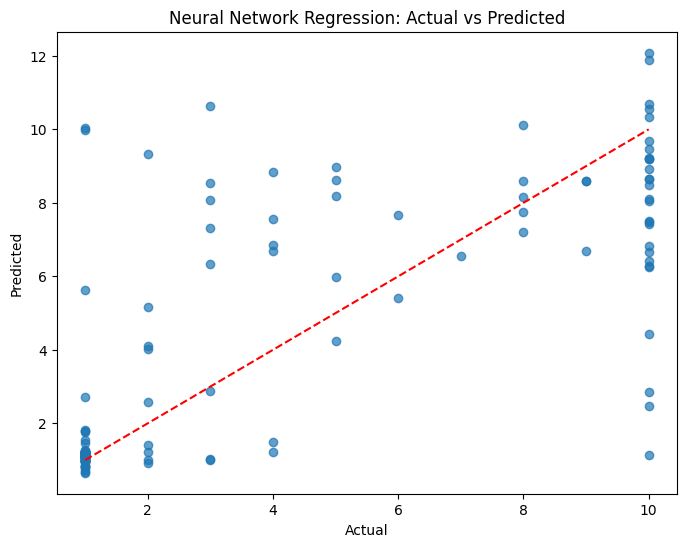

Mean Squared Error: 6.302251728562707
Mean Absolute Error: 1.4489180423917563
R-squared: 0.5347465694362321


In [171]:
# Drop rows with NaN in X_train, y_train, X_test, y_test
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]
# Linear Regression Model
model, metrics = linear_regression_model(X_train_clean, X_test_clean, y_train_clean, y_test_clean, plot_curves=True)
print("Mean Squared Error:", metrics['mse'])
print("Mean Absolute Error:", metrics['mae'])
print("R-squared:", metrics['r2']) 
# SVM Regression Model
model, metrics = SVM_regression(X_train_clean, X_test_clean, y_train_clean, y_test_clean, plot_curves=True)
print("Mean Squared Error:", metrics['mse'])
print("Mean Absolute Error:", metrics['mae'])
print("R-squared:", metrics['r2']) 
# Decision Tree Regression Model
model, metrics = decision_tree_regression(X_train_clean, X_test_clean, y_train_clean, y_test_clean, max_depth=5, plot_curves=True)
print("Mean Squared Error:", metrics['mse'])
print("Mean Absolute Error:", metrics['mae'])
print("R-squared:", metrics['r2'])
#random forest regression model
model, metrics, best_params = random_forest_regression(X_train_clean, X_test_clean, y_train_clean, y_test_clean, n_estimators=100, max_depth=5, plot_curves=True, tune_hyperparams=True)
print("Mean Squared Error:", metrics['mse'])
print("Mean Absolute Error:", metrics['mae'])
print("R-squared:", metrics['r2'])
if best_params is not None:
	print("Best Parameters:", best_params)# Neural Network Regression Model
model, metrics = neural_network_regression(X_train_clean, X_test_clean, y_train_clean, y_test_clean, hidden_layers=(64, 32), epochs=100, plot_curves=True)
print("Mean Squared Error:", metrics['mse'])
print("Mean Absolute Error:", metrics['mae'])
print("R-squared:", metrics['r2'])  